<a href="https://colab.research.google.com/github/NAVIER-USN/colabs/blob/main/buoy_segment_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
%%capture
!pip install ultralytics
#install dependencies and SAM
!pip install opencv-python pycocotools matplotlib onnxruntime onnx
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install torch
!pip install torchvision


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
from segment_anything import SamPredictor, sam_model_registry, SamAutomaticMaskGenerator
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


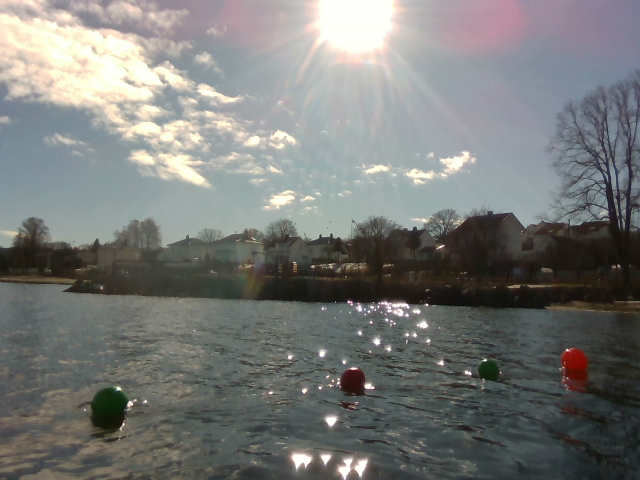

In [26]:
path = "/content/drive/Shareddrives/Navier USN/Software/"

model_type = 'vit_h'
device = 'cuda'
sam_checkpoint = path + "ML_models/sam_vit_h_4b8939.pth"

#load the model and allocate to gpu
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
mask_generator = SamAutomaticMaskGenerator(sam)

#load an image
img = cv2.imread(path + "datasets/dataset_buoys_train/images/00853cbd-t6dazNBtSM.png")
cv2_imshow(img)

In [27]:
# apply model to image to generate object masks
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(img)

In [28]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

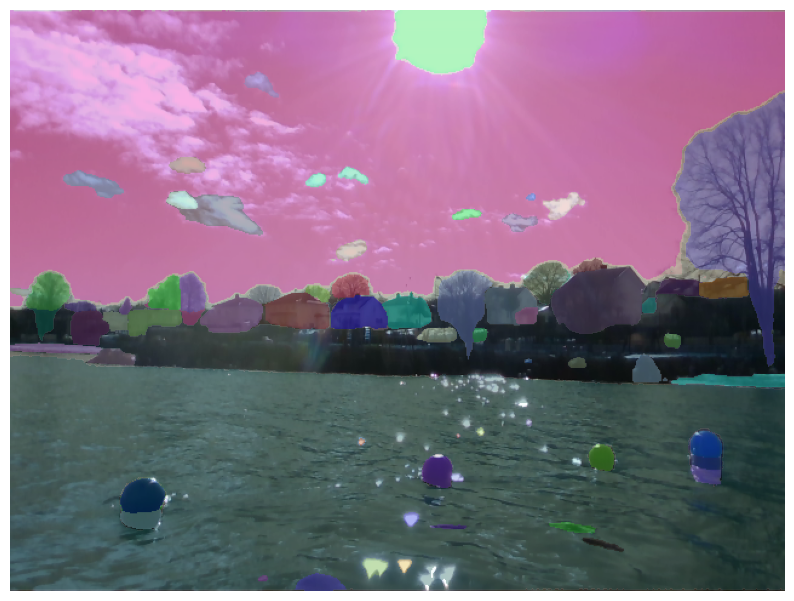

In [29]:
#plot the masks onto the image
plt.figure(figsize=(10,10))
plt.imshow(img)
show_anns(masks)
plt.axis('off')
plt.show()